# 8章　MNISTを使った数字認識

In [2]:
# 必要ライブラリの導入

!pip install japanize_matplotlib | tail -n 1
!pip install torchviz | tail -n 1
!pip install torchinfo | tail -n 1

In [3]:
# 必要ライブラリのインポート

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import japanize_matplotlib
from IPython.display import display

In [4]:
# torch関連ライブラリのインポート

import torch
import torch.nn as nn
import torch.optim as optim
from torchinfo import summary
from torchviz import make_dot

/home/miyawaki/anaconda3/envs/irvs_get_started/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [5]:
# warning表示off
import warnings
warnings.simplefilter('ignore')

# デフォルトフォントサイズ変更
plt.rcParams['font.size'] = 14

# デフォルトグラフサイズ変更
plt.rcParams['figure.figsize'] = (6,6)

# デフォルトで方眼表示ON
plt.rcParams['axes.grid'] = True

# numpyの表示桁数設定
np.set_printoptions(suppress=True, precision=5)

## 8.3 ReLU関数

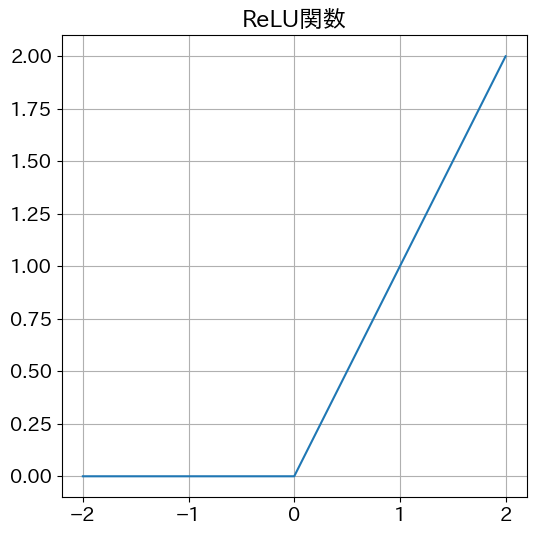

In [6]:
# ReLU関数のグラフ

relu = nn.ReLU()
x_np = np.arange(-2, 2.1, 0.25)
x = torch.tensor(x_np).float()
y = relu(x)

plt.plot(x.data, y.data)
plt.title('ReLU関数')
plt.show()

## 8.4 GPU利用

### GPUチェック

In [7]:
# デバイスの割り当て
device = torch.device("cuda:0")
print(device)
print(torch.cuda.is_available())

cuda:0
True


In [8]:
# テスト用tensor変数x , y 
x_np = np.arange(-2.0, 2.1, 0.25)
y_np = np.arange(-1.0, 3.1, 0.25)
x = torch.tensor(x_np).float()
y = torch.tensor(y_np).float()

# xとyの間の演算
z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000])


In [9]:
# 変数xをGPUに送る
x = x.to(device)

# 変数xとyの属性data, deviceの確認
print('x: ', x.device)
print('y: ', y.device)

x:  cuda:0
y:  cpu


In [10]:
# この状態でxとyの演算をすると。。。

z = x * y

RuntimeError: Expected all tensors to be on the same device, but found at least two devices, cuda:0 and cpu!

In [11]:
# yもGPUに送る
y = y.to(device)

# 今度は計算可能になる
z = x * y
print(z)

tensor([ 2.0000,  1.3125,  0.7500,  0.3125, -0.0000, -0.1875, -0.2500, -0.1875,
         0.0000,  0.3125,  0.7500,  1.3125,  2.0000,  2.8125,  3.7500,  4.8125,
         6.0000], device='cuda:0')


## 8.8 データ準備1 (データセットによる読み込み)

In [12]:
# ライブラリインポート
import torchvision.datasets as datasets

# ダウンロード先ディレクトリ名
data_root = './data'

train_set0 = datasets.MNIST(
    # 元データダウンロード先の指定
    root = data_root,  
    # 訓練データか検証データか
    train = True,  
    # 元データがない場合にダウンロードするか
    download = True)

In [13]:
# ダウンロードしたファイルの確認

!ls -lR ./data/MNIST

./data/MNIST:
合計 0
drwxrwxr-x 2 miyawaki miyawaki 262  5月  1 14:16 raw

./data/MNIST/raw:
合計 65008
-rw-rw-r-- 1 miyawaki miyawaki  7840016  5月  1 14:16 t10k-images-idx3-ubyte
-rw-rw-r-- 1 miyawaki miyawaki  1648877  5月  1 14:16 t10k-images-idx3-ubyte.gz
-rw-rw-r-- 1 miyawaki miyawaki    10008  5月  1 14:16 t10k-labels-idx1-ubyte
-rw-rw-r-- 1 miyawaki miyawaki     4542  5月  1 14:16 t10k-labels-idx1-ubyte.gz
-rw-rw-r-- 1 miyawaki miyawaki 47040016  5月  1 14:16 train-images-idx3-ubyte
-rw-rw-r-- 1 miyawaki miyawaki  9912422  5月  1 14:16 train-images-idx3-ubyte.gz
-rw-rw-r-- 1 miyawaki miyawaki    60008  5月  1 14:16 train-labels-idx1-ubyte
-rw-rw-r-- 1 miyawaki miyawaki    28881  5月  1 14:16 train-labels-idx1-ubyte.gz


In [14]:
# データ件数の確認
print('データ件数: ', len(train_set0))

# 最初の要素の取得
image, label = train_set0[0]

# データ型の確認
print('入力データの型: ', type(image))
print('正解データの型: ', type(label))

データ件数:  60000
入力データの型:  <class 'PIL.Image.Image'>
正解データの型:  <class 'int'>


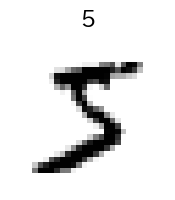

In [15]:
# 入力データの画像表示

plt.figure(figsize=(2,3))
plt.title(f'{label}')
plt.imshow(image, cmap='gray_r')
plt.axis('off')
plt.show()

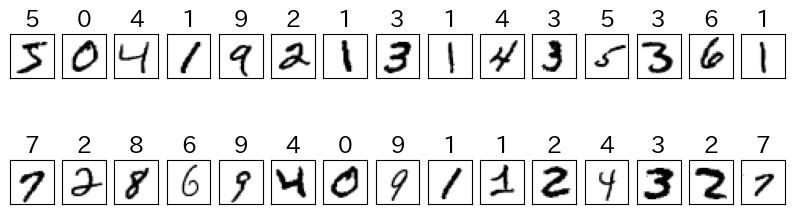

In [24]:
# 正解データ付きで、最初の20個をイメージ表示

plt.figure(figsize=(10, 3))
for i in range(30):
    ax = plt.subplot(2, 15, i+1) # 2行15列のグラフのi+1番目, 3つめの引数はサブ領域の番号
    image, label = train_set0[i]
    # イメージ表示
    plt.imshow(image, cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

## 8.9 データ準備2 (Transformsによるデータ前処理)

### Step1 ToTensorの利用

In [25]:
# ライブラリインポート
import torchvision.transforms as transforms

transform1 = transforms.Compose([
    # データのTensor化
    transforms.ToTensor(),
])

train_set1 = datasets.MNIST(
    root=data_root,  train=True,  download=True,
    transform = transform1)

In [26]:
# 変換結果の確認

image, label = train_set1[0]
print('入力データの型: ', type(image))
print('入力データのshape: ', image.shape)
print('最小値: ', image.data.min())
print('最大値: ', image.data.max())

入力データの型:  <class 'torch.Tensor'>
入力データのshape:  torch.Size([1, 28, 28])
最小値:  tensor(0.)
最大値:  tensor(1.)


### Step2 Normalizeの利用

In [27]:
# transforms.Composeで複数の前処理をまとめて実行
transform2 = transforms.Compose([
    # データのTensor化
    transforms.ToTensor(),
    
    # データの正規化
    transforms.Normalize(0.5,  0.5),
])
# Normalize(平均, 標準偏差)となる。x_new = (x - 0.5) / 0.5 となるので、x_new = 2x-1となる
# もともとのデータは0-1の範囲なので、-1から1の範囲になる

train_set2 = datasets.MNIST(
    root = data_root,  train = True,  download = True,
    transform = transform2) 
#q: transformには何を指定するか
#a: データの前処理を指定する

In [28]:
# 変換結果の確認

image, label = train_set2[0]
print('shape: ', image.shape)
print('最小値: ', image.data.min())
print('最大値: ', image.data.max())

shape:  torch.Size([1, 28, 28])
最小値:  tensor(-1.)
最大値:  tensor(1.)


上の確認でわかるように、入力サイズは28 x 28で最小値と最大値は−１から１になっている。

### Step3 Lambdaを利用して1階テンソル化

In [29]:
transform3 = transforms.Compose([
    # データのTensor化
    transforms.ToTensor(),
    
    # データの正規化
    transforms.Normalize(0.5, 0.5),
    
    # Tensorの1階テンソル化
    transforms.Lambda(lambda x: x.view(-1)), #viewはテンソルの場合に次元を変更する関数
])

train_set3 = datasets.MNIST(
    root = data_root,  train = True,  
    download=True, transform = transform3)

In [30]:
# 変換結果の確認

image, label = train_set3[0]
print('shape: ', image.shape)
print('最小値: ', image.data.min())
print('最大値: ', image.data.max())

shape:  torch.Size([784])
最小値:  tensor(-1.)
最大値:  tensor(1.)


### 最終的な実装

In [31]:
# データ変換用関数 Transforms
# (1) Imageをテンソル化
# (2) [0, 1]の範囲の値を[-1, 1]の範囲にする
# (3) データのshapeを[1, 28, 28]から[784]に変換

transform = transforms.Compose([
    # (1) データのテンソル化
    transforms.ToTensor(),
    
    # (2) データの正規化
    transforms.Normalize(0.5, 0.5),
    
    # (3) 1階テンソルに変換
    transforms.Lambda(lambda x: x.view(-1)),
])

In [32]:
# データ取得用関数 Dataset

# 訓練用データセットの定義
train_set = datasets.MNIST(
    root = data_root, train = True,
    download = True, transform = transform)

# 検証データセットの定義
test_set = datasets.MNIST(
    root = data_root, train = False, 
    download = True, transform = transform)

## 8.10 データ準備3 データローダーによるミニバッチ用データ生成)

In [33]:
# ライブラリインポート
from torch.utils.data import DataLoader

# ミニバッチのサイズ指定
batch_size = 500

# 訓練用データローダー
# 訓練用なので、シャッフルをかける
train_loader = DataLoader(
    train_set, batch_size = batch_size, 
    shuffle = True)

# 検証用データローダー
# 検証時にシャッフルは不要
test_loader = DataLoader(
    test_set,  batch_size = batch_size, 
    shuffle = False) 

In [34]:
# 何組のデータが取得できるか
print(len(train_loader))

# DataLoaderから最初の1セットを取得する
for images, labels in train_loader:
    break

print(images.shape)
print(labels.shape)

120
torch.Size([500, 784])
torch.Size([500])


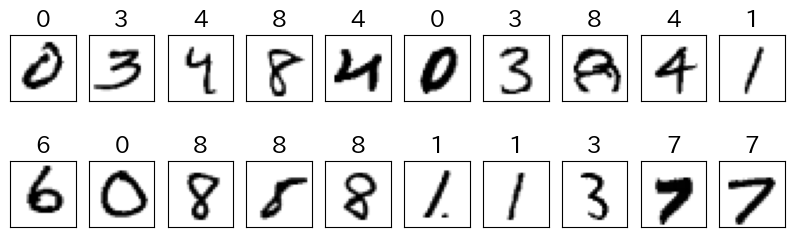

In [35]:
# イメージ表示
plt.figure(figsize=(10, 3))
for i in range(20):
    ax = plt.subplot(2, 10, i + 1)
    
    # numpyに変換
    image = images[i].numpy()
    label = labels[i]
    
    # imgの範囲を[0, 1]に戻す
    image2 = (image + 1)/ 2
    # イメージ表示
    plt.imshow(image2.reshape(28, 28),cmap='gray_r')
    ax.set_title(f'{label}')
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

全体で60000件ある訓練データが120個のグループに分割されて取得できていることがわかります。  
今回はテスト用でシャッフルなしでデータを取得しましたが、訓練データは取得のたびにシャッフルがかかります。  
つまり、ミニバッチ用のデータセットが自動的に取得できていることになります。

## 8.11 モデル定義

In [36]:
# 入力次元数
n_input = image.shape[0]

# 出力次元数
# 分類先クラス数　今回は10になる
n_output = 10

#   隠れ層のノード数
n_hidden = 128

# 結果確認
print(f'n_input: {n_input}  n_hidden: {n_hidden} n_output: {n_output}')

n_input: 784  n_hidden: 128 n_output: 10


In [37]:
# モデルの定義
# 784入力10出力1隠れ層のニューラルネットワークモデル

class Net(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()

        # 隠れ層の定義 (隠れ層のノード数: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 出力層の定義
        self.l2 = nn.Linear(n_hidden, n_output)

        # ReLU関数の定義
        self.relu = nn.ReLU(inplace=True)
   
    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        return x3

In [38]:
# 乱数の固定化
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# モデルインスタンス生成
net = Net(n_input, n_output, n_hidden)

# モデルをGPU側に送る
net = net.to(device)

### 最適化アルゴリズムと損失関数

In [39]:
# 学習率
device = torch.device("cuda")
# アルゴリズム: 勾配降下法
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

NameError: name 'lr' is not defined

### モデル確認

In [ ]:
# モデル内のパラメータの確認
# l1.weight, l1.bias, l2.weight, l2.biasがあることがわかる

for parameter in net.named_parameters():
    print(parameter)

In [ ]:
# モデルの概要表示

print(net)

In [ ]:
# モデルのサマリー表示

summary(net, (784,))

## 8.12 勾配降下法

### 予測計算

In [40]:
# 訓練データセット　最初の1項目を取得
# データローダーから最初の1セットを取得する
for images, labels in train_loader:
    break 

In [41]:
# データローダーから取得したデータをGPUに送る
inputs = images.to(device)
labels = labels.to(device)

In [42]:
# 予測計算
outputs = net(inputs)

# 結果確認
print(outputs)

tensor([[-0.2908, -0.0540,  0.0845,  ...,  0.0779,  0.1828,  0.1080],
        [-0.2764, -0.3271, -0.1788,  ...,  0.1037,  0.1030, -0.0235],
        [-0.3289, -0.0409,  0.1447,  ...,  0.3945,  0.2317,  0.1213],
        ...,
        [-0.4067, -0.0062,  0.1470,  ...,  0.0346,  0.1045,  0.1304],
        [-0.3684, -0.2211,  0.1907,  ...,  0.0544,  0.2114,  0.1275],
        [-0.2524, -0.2597,  0.1427,  ...,  0.0983,  0.1258,  0.0972]],
       device='cuda:0', grad_fn=<AddmmBackward0>)


### 損失関数

#### 損失計算と計算グラフの可視化

In [43]:
#  損失計算
loss = criterion(outputs, labels)

# 損失値の取得
print(loss.item())

# 損失の計算グラフ可視化
g = make_dot(loss, params=dict(net.named_parameters()))
display(g)

NameError: name 'criterion' is not defined

### 勾配計算

In [ ]:
# 勾配計算の実行
loss.backward()

In [ ]:
# 勾配計算の結果
w = net.to('cpu')
print(w.l1.weight.grad.numpy())
print(w.l1.bias.grad.numpy())
print(w.l2.weight.grad.numpy())
print(w.l2.bias.grad.numpy())

### パラメータ修正

In [ ]:
# 勾配降下法の適用
optimizer.step()

In [ ]:
# パラメータ値の表示
print(net.l1.weight)
print(net.l1.bias)

### 繰り返し計算（ここから）

In [44]:
# 乱数の固定化
torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

# 学習率
lr = 0.01

# モデルインスタンス生成
net = Net(n_input, n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 100

# 評価結果記録用
history = np.zeros((0,5))

In [46]:
# tqdmライブラリのインポート
from tqdm.auto import tqdm

# 繰り返し計算メインループ

for epoch in range(num_epochs):
    # 1エポックあたりの正解数(精度計算用)
    n_train_acc, n_val_acc = 0, 0
    # 1エポックあたりの累積損失(平均化前)
    train_loss, val_loss = 0, 0
    # 1エポックあたりのデータ累積件数
    n_train, n_test = 0, 0

    # 訓練フェーズ
    for inputs, labels in tqdm(train_loader):
        # 1バッチあたりのデータ件数
        train_batch_size = len(labels)
        # 1エポックあたりのデータ累積件数
        n_train += train_batch_size

        # GPUヘ転送
        inputs = inputs.to(device)
        labels = labels.to(device)
    
        #勾配の初期化
        optimizer.zero_grad()

        # 予測計算
        outputs = net(inputs)

        # 損失計算
        loss = criterion(outputs, labels)

        # 勾配計算
        loss.backward()
    
        # パラメータ修正
        optimizer.step()

        # 予測ラベル導出
        predicted = torch.max(outputs, 1)[1] # 最大値のインデックスを取得

        # 平均前の損失と正解数の計算
        # lossは平均計算が行われているので平均前の損失に戻して加算
        train_loss += loss.item() * train_batch_size 
        n_train_acc += (predicted == labels).sum().item() 

    #予測フェーズ
    for inputs_test, labels_test in test_loader:
        # 1バッチあたりのデータ件数
        test_batch_size = len(labels_test)
        # 1エポックあたりのデータ累積件数
        n_test += test_batch_size

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)
            
        # 予測計算
        outputs_test = net(inputs_test)

        # 損失計算
        loss_test = criterion(outputs_test, labels_test)

        #予測ラベル導出
        predicted_test = torch.max(outputs_test, 1)[1]

        #  平均前の損失と正解数の計算
        # lossは平均計算が行われているので平均前の損失に戻して加算
        val_loss +=  loss_test.item() * test_batch_size
        n_val_acc +=  (predicted_test == labels_test).sum().item()

    # 精度計算
    train_acc = n_train_acc / n_train
    val_acc = n_val_acc / n_test
    # 損失計算
    ave_train_loss = train_loss / n_train
    ave_val_loss = val_loss / n_test
    # 結果表示
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {ave_train_loss:.5f} acc: {train_acc:.5f} val_loss: {ave_val_loss:.5f}, val_acc: {val_acc:.5f}')
    # 記録
    item = np.array([epoch+1 , ave_train_loss, train_acc, ave_val_loss, val_acc])
    history = np.vstack((history, item))

100%|██████████| 120/120 [00:08<00:00, 14.78it/s]


Epoch [1/100], loss: 1.82979 acc: 0.56707 val_loss: 1.32723, val_acc: 0.76460


100%|██████████| 120/120 [00:07<00:00, 15.64it/s]


Epoch [2/100], loss: 1.03963 acc: 0.79607 val_loss: 0.79882, val_acc: 0.83330


100%|██████████| 120/120 [00:07<00:00, 15.08it/s]


Epoch [3/100], loss: 0.70848 acc: 0.84057 val_loss: 0.60380, val_acc: 0.86080


100%|██████████| 120/120 [00:07<00:00, 15.01it/s]


Epoch [4/100], loss: 0.57304 acc: 0.86062 val_loss: 0.51197, val_acc: 0.87190


100%|██████████| 120/120 [00:07<00:00, 15.21it/s]


Epoch [5/100], loss: 0.50225 acc: 0.87170 val_loss: 0.45877, val_acc: 0.88030


100%|██████████| 120/120 [00:07<00:00, 15.02it/s]


Epoch [6/100], loss: 0.45891 acc: 0.87905 val_loss: 0.42454, val_acc: 0.88630


100%|██████████| 120/120 [00:08<00:00, 14.95it/s]


Epoch [7/100], loss: 0.42950 acc: 0.88365 val_loss: 0.39989, val_acc: 0.89040


100%|██████████| 120/120 [00:07<00:00, 15.23it/s]


Epoch [8/100], loss: 0.40810 acc: 0.88755 val_loss: 0.38295, val_acc: 0.89360


100%|██████████| 120/120 [00:07<00:00, 15.04it/s]


Epoch [9/100], loss: 0.39181 acc: 0.89043 val_loss: 0.36888, val_acc: 0.89650


100%|██████████| 120/120 [00:07<00:00, 15.37it/s]


Epoch [10/100], loss: 0.37880 acc: 0.89325 val_loss: 0.35792, val_acc: 0.89900


100%|██████████| 120/120 [00:07<00:00, 15.13it/s]


Epoch [11/100], loss: 0.36810 acc: 0.89587 val_loss: 0.34832, val_acc: 0.90130


100%|██████████| 120/120 [00:07<00:00, 15.63it/s]


Epoch [12/100], loss: 0.35927 acc: 0.89780 val_loss: 0.34038, val_acc: 0.90270


100%|██████████| 120/120 [00:07<00:00, 15.07it/s]


Epoch [13/100], loss: 0.35149 acc: 0.89948 val_loss: 0.33504, val_acc: 0.90390


100%|██████████| 120/120 [00:08<00:00, 14.87it/s]


Epoch [14/100], loss: 0.34480 acc: 0.90072 val_loss: 0.32821, val_acc: 0.90680


100%|██████████| 120/120 [00:07<00:00, 15.16it/s]


Epoch [15/100], loss: 0.33898 acc: 0.90267 val_loss: 0.32254, val_acc: 0.90650


100%|██████████| 120/120 [00:07<00:00, 15.22it/s]


Epoch [16/100], loss: 0.33335 acc: 0.90425 val_loss: 0.31786, val_acc: 0.90860


100%|██████████| 120/120 [00:07<00:00, 15.56it/s]


Epoch [17/100], loss: 0.32841 acc: 0.90512 val_loss: 0.31379, val_acc: 0.90910


100%|██████████| 120/120 [00:07<00:00, 15.12it/s]


Epoch [18/100], loss: 0.32384 acc: 0.90667 val_loss: 0.30992, val_acc: 0.91270


100%|██████████| 120/120 [00:07<00:00, 15.01it/s]


Epoch [19/100], loss: 0.31964 acc: 0.90757 val_loss: 0.30670, val_acc: 0.91110


100%|██████████| 120/120 [00:08<00:00, 14.87it/s]


Epoch [20/100], loss: 0.31572 acc: 0.90925 val_loss: 0.30359, val_acc: 0.91230


100%|██████████| 120/120 [00:08<00:00, 14.65it/s]


Epoch [21/100], loss: 0.31198 acc: 0.91035 val_loss: 0.30051, val_acc: 0.91360


100%|██████████| 120/120 [00:07<00:00, 15.21it/s]


Epoch [22/100], loss: 0.30863 acc: 0.91123 val_loss: 0.29660, val_acc: 0.91470


100%|██████████| 120/120 [00:07<00:00, 15.43it/s]


Epoch [23/100], loss: 0.30517 acc: 0.91232 val_loss: 0.29402, val_acc: 0.91620


100%|██████████| 120/120 [00:08<00:00, 14.77it/s]


Epoch [24/100], loss: 0.30196 acc: 0.91357 val_loss: 0.29118, val_acc: 0.91620


100%|██████████| 120/120 [00:07<00:00, 15.16it/s]


Epoch [25/100], loss: 0.29914 acc: 0.91415 val_loss: 0.28870, val_acc: 0.91750


100%|██████████| 120/120 [00:08<00:00, 14.54it/s]


Epoch [26/100], loss: 0.29609 acc: 0.91542 val_loss: 0.28608, val_acc: 0.91840


100%|██████████| 120/120 [00:07<00:00, 15.07it/s]


Epoch [27/100], loss: 0.29323 acc: 0.91610 val_loss: 0.28366, val_acc: 0.91830


100%|██████████| 120/120 [00:07<00:00, 15.15it/s]


Epoch [28/100], loss: 0.29038 acc: 0.91747 val_loss: 0.28145, val_acc: 0.92060


100%|██████████| 120/120 [00:08<00:00, 14.87it/s]


Epoch [29/100], loss: 0.28771 acc: 0.91748 val_loss: 0.27998, val_acc: 0.92180


100%|██████████| 120/120 [00:08<00:00, 14.83it/s]


Epoch [30/100], loss: 0.28518 acc: 0.91850 val_loss: 0.27709, val_acc: 0.92050


100%|██████████| 120/120 [00:07<00:00, 15.09it/s]


Epoch [31/100], loss: 0.28244 acc: 0.91960 val_loss: 0.27662, val_acc: 0.92170


100%|██████████| 120/120 [00:07<00:00, 15.14it/s]


Epoch [32/100], loss: 0.28004 acc: 0.91992 val_loss: 0.27309, val_acc: 0.92220


100%|██████████| 120/120 [00:07<00:00, 15.05it/s]


Epoch [33/100], loss: 0.27763 acc: 0.92043 val_loss: 0.27143, val_acc: 0.92170


100%|██████████| 120/120 [00:08<00:00, 14.74it/s]


Epoch [34/100], loss: 0.27499 acc: 0.92132 val_loss: 0.26867, val_acc: 0.92330


100%|██████████| 120/120 [00:08<00:00, 14.55it/s]


Epoch [35/100], loss: 0.27287 acc: 0.92232 val_loss: 0.26696, val_acc: 0.92250


100%|██████████| 120/120 [00:07<00:00, 15.16it/s]


Epoch [36/100], loss: 0.27051 acc: 0.92277 val_loss: 0.26536, val_acc: 0.92460


100%|██████████| 120/120 [00:07<00:00, 15.52it/s]


Epoch [37/100], loss: 0.26821 acc: 0.92355 val_loss: 0.26318, val_acc: 0.92490


100%|██████████| 120/120 [00:08<00:00, 14.90it/s]


Epoch [38/100], loss: 0.26605 acc: 0.92387 val_loss: 0.26113, val_acc: 0.92540


100%|██████████| 120/120 [00:08<00:00, 14.88it/s]


Epoch [39/100], loss: 0.26380 acc: 0.92465 val_loss: 0.25970, val_acc: 0.92650


100%|██████████| 120/120 [00:08<00:00, 14.80it/s]


Epoch [40/100], loss: 0.26162 acc: 0.92545 val_loss: 0.25752, val_acc: 0.92600


100%|██████████| 120/120 [00:07<00:00, 15.09it/s]


Epoch [41/100], loss: 0.25949 acc: 0.92625 val_loss: 0.25571, val_acc: 0.92740


100%|██████████| 120/120 [00:07<00:00, 15.18it/s]


Epoch [42/100], loss: 0.25720 acc: 0.92652 val_loss: 0.25368, val_acc: 0.92690


100%|██████████| 120/120 [00:08<00:00, 14.94it/s]


Epoch [43/100], loss: 0.25521 acc: 0.92695 val_loss: 0.25150, val_acc: 0.92870


100%|██████████| 120/120 [00:08<00:00, 14.93it/s]


Epoch [44/100], loss: 0.25305 acc: 0.92778 val_loss: 0.24931, val_acc: 0.92870


100%|██████████| 120/120 [00:07<00:00, 15.35it/s]


Epoch [45/100], loss: 0.25096 acc: 0.92880 val_loss: 0.24818, val_acc: 0.93000


100%|██████████| 120/120 [00:08<00:00, 14.88it/s]


Epoch [46/100], loss: 0.24889 acc: 0.92923 val_loss: 0.24608, val_acc: 0.93000


100%|██████████| 120/120 [00:07<00:00, 15.32it/s]


Epoch [47/100], loss: 0.24684 acc: 0.92985 val_loss: 0.24438, val_acc: 0.92990


100%|██████████| 120/120 [00:07<00:00, 15.08it/s]


Epoch [48/100], loss: 0.24475 acc: 0.93048 val_loss: 0.24292, val_acc: 0.93090


100%|██████████| 120/120 [00:08<00:00, 14.95it/s]


Epoch [49/100], loss: 0.24275 acc: 0.93090 val_loss: 0.24057, val_acc: 0.93230


100%|██████████| 120/120 [00:08<00:00, 14.77it/s]


Epoch [50/100], loss: 0.24088 acc: 0.93138 val_loss: 0.23888, val_acc: 0.93260


100%|██████████| 120/120 [00:07<00:00, 15.31it/s]


Epoch [51/100], loss: 0.23881 acc: 0.93213 val_loss: 0.23721, val_acc: 0.93250


100%|██████████| 120/120 [00:07<00:00, 15.68it/s]


Epoch [52/100], loss: 0.23698 acc: 0.93248 val_loss: 0.23527, val_acc: 0.93290


100%|██████████| 120/120 [00:07<00:00, 15.50it/s]


Epoch [53/100], loss: 0.23485 acc: 0.93368 val_loss: 0.23338, val_acc: 0.93430


100%|██████████| 120/120 [00:08<00:00, 14.92it/s]


Epoch [54/100], loss: 0.23302 acc: 0.93423 val_loss: 0.23229, val_acc: 0.93370


100%|██████████| 120/120 [00:07<00:00, 15.05it/s]


Epoch [55/100], loss: 0.23114 acc: 0.93470 val_loss: 0.23069, val_acc: 0.93470


100%|██████████| 120/120 [00:07<00:00, 15.34it/s]


Epoch [56/100], loss: 0.22923 acc: 0.93517 val_loss: 0.22932, val_acc: 0.93410


100%|██████████| 120/120 [00:08<00:00, 14.88it/s]


Epoch [57/100], loss: 0.22734 acc: 0.93592 val_loss: 0.22688, val_acc: 0.93500


100%|██████████| 120/120 [00:07<00:00, 15.13it/s]


Epoch [58/100], loss: 0.22558 acc: 0.93652 val_loss: 0.22545, val_acc: 0.93610


100%|██████████| 120/120 [00:07<00:00, 15.36it/s]


Epoch [59/100], loss: 0.22392 acc: 0.93672 val_loss: 0.22357, val_acc: 0.93610


100%|██████████| 120/120 [00:07<00:00, 15.08it/s]


Epoch [60/100], loss: 0.22213 acc: 0.93730 val_loss: 0.22238, val_acc: 0.93650


100%|██████████| 120/120 [00:07<00:00, 15.16it/s]


Epoch [61/100], loss: 0.22025 acc: 0.93788 val_loss: 0.22039, val_acc: 0.93690


100%|██████████| 120/120 [00:08<00:00, 14.92it/s]


Epoch [62/100], loss: 0.21852 acc: 0.93845 val_loss: 0.21852, val_acc: 0.93720


100%|██████████| 120/120 [00:08<00:00, 14.82it/s]


Epoch [63/100], loss: 0.21678 acc: 0.93875 val_loss: 0.21707, val_acc: 0.93750


100%|██████████| 120/120 [00:07<00:00, 15.67it/s]


Epoch [64/100], loss: 0.21514 acc: 0.93948 val_loss: 0.21590, val_acc: 0.93710


100%|██████████| 120/120 [00:08<00:00, 14.99it/s]


Epoch [65/100], loss: 0.21329 acc: 0.93978 val_loss: 0.21394, val_acc: 0.93880


100%|██████████| 120/120 [00:07<00:00, 15.13it/s]


Epoch [66/100], loss: 0.21171 acc: 0.94027 val_loss: 0.21303, val_acc: 0.93980


100%|██████████| 120/120 [00:08<00:00, 14.45it/s]


Epoch [67/100], loss: 0.21005 acc: 0.94100 val_loss: 0.21134, val_acc: 0.93910


100%|██████████| 120/120 [00:08<00:00, 14.69it/s]


Epoch [68/100], loss: 0.20841 acc: 0.94137 val_loss: 0.20903, val_acc: 0.93970


100%|██████████| 120/120 [00:07<00:00, 15.06it/s]


Epoch [69/100], loss: 0.20678 acc: 0.94187 val_loss: 0.20845, val_acc: 0.94010


100%|██████████| 120/120 [00:07<00:00, 15.25it/s]


Epoch [70/100], loss: 0.20517 acc: 0.94227 val_loss: 0.20728, val_acc: 0.94130


100%|██████████| 120/120 [00:07<00:00, 15.35it/s]


Epoch [71/100], loss: 0.20359 acc: 0.94297 val_loss: 0.20521, val_acc: 0.93910


100%|██████████| 120/120 [00:08<00:00, 14.91it/s]


Epoch [72/100], loss: 0.20220 acc: 0.94332 val_loss: 0.20368, val_acc: 0.94100


100%|██████████| 120/120 [00:07<00:00, 15.63it/s]


Epoch [73/100], loss: 0.20060 acc: 0.94327 val_loss: 0.20252, val_acc: 0.94220


100%|██████████| 120/120 [00:07<00:00, 15.42it/s]


Epoch [74/100], loss: 0.19905 acc: 0.94410 val_loss: 0.20107, val_acc: 0.94320


100%|██████████| 120/120 [00:07<00:00, 15.35it/s]


Epoch [75/100], loss: 0.19747 acc: 0.94435 val_loss: 0.19951, val_acc: 0.94310


100%|██████████| 120/120 [00:07<00:00, 15.13it/s]


Epoch [76/100], loss: 0.19613 acc: 0.94487 val_loss: 0.19792, val_acc: 0.94340


100%|██████████| 120/120 [00:07<00:00, 15.05it/s]


Epoch [77/100], loss: 0.19481 acc: 0.94490 val_loss: 0.19665, val_acc: 0.94280


100%|██████████| 120/120 [00:08<00:00, 14.89it/s]


Epoch [78/100], loss: 0.19312 acc: 0.94585 val_loss: 0.19560, val_acc: 0.94320


100%|██████████| 120/120 [00:07<00:00, 15.18it/s]


Epoch [79/100], loss: 0.19183 acc: 0.94618 val_loss: 0.19432, val_acc: 0.94420


100%|██████████| 120/120 [00:07<00:00, 15.09it/s]


Epoch [80/100], loss: 0.19049 acc: 0.94690 val_loss: 0.19283, val_acc: 0.94400


100%|██████████| 120/120 [00:07<00:00, 15.31it/s]


Epoch [81/100], loss: 0.18911 acc: 0.94692 val_loss: 0.19222, val_acc: 0.94450


100%|██████████| 120/120 [00:08<00:00, 14.94it/s]


Epoch [82/100], loss: 0.18777 acc: 0.94732 val_loss: 0.19045, val_acc: 0.94550


100%|██████████| 120/120 [00:07<00:00, 15.06it/s]


Epoch [83/100], loss: 0.18629 acc: 0.94773 val_loss: 0.18912, val_acc: 0.94520


100%|██████████| 120/120 [00:07<00:00, 15.10it/s]


Epoch [84/100], loss: 0.18514 acc: 0.94808 val_loss: 0.18789, val_acc: 0.94460


100%|██████████| 120/120 [00:08<00:00, 14.92it/s]


Epoch [85/100], loss: 0.18356 acc: 0.94875 val_loss: 0.18686, val_acc: 0.94610


100%|██████████| 120/120 [00:07<00:00, 15.31it/s]


Epoch [86/100], loss: 0.18239 acc: 0.94902 val_loss: 0.18585, val_acc: 0.94540


100%|██████████| 120/120 [00:08<00:00, 15.00it/s]


Epoch [87/100], loss: 0.18096 acc: 0.94963 val_loss: 0.18485, val_acc: 0.94590


100%|██████████| 120/120 [00:07<00:00, 15.42it/s]


Epoch [88/100], loss: 0.17997 acc: 0.94985 val_loss: 0.18338, val_acc: 0.94680


100%|██████████| 120/120 [00:08<00:00, 14.91it/s]


Epoch [89/100], loss: 0.17864 acc: 0.95015 val_loss: 0.18222, val_acc: 0.94640


100%|██████████| 120/120 [00:08<00:00, 14.97it/s]


Epoch [90/100], loss: 0.17748 acc: 0.95045 val_loss: 0.18174, val_acc: 0.94710


100%|██████████| 120/120 [00:07<00:00, 15.35it/s]


Epoch [91/100], loss: 0.17617 acc: 0.95110 val_loss: 0.18037, val_acc: 0.94680


100%|██████████| 120/120 [00:08<00:00, 14.83it/s]


Epoch [92/100], loss: 0.17509 acc: 0.95153 val_loss: 0.17863, val_acc: 0.94700


100%|██████████| 120/120 [00:08<00:00, 14.95it/s]


Epoch [93/100], loss: 0.17391 acc: 0.95160 val_loss: 0.17791, val_acc: 0.94790


100%|██████████| 120/120 [00:08<00:00, 14.50it/s]


Epoch [94/100], loss: 0.17275 acc: 0.95207 val_loss: 0.17694, val_acc: 0.94780


100%|██████████| 120/120 [00:07<00:00, 15.17it/s]


Epoch [95/100], loss: 0.17153 acc: 0.95255 val_loss: 0.17568, val_acc: 0.94820


100%|██████████| 120/120 [00:07<00:00, 15.19it/s]


Epoch [96/100], loss: 0.17033 acc: 0.95242 val_loss: 0.17462, val_acc: 0.94850


100%|██████████| 120/120 [00:07<00:00, 15.12it/s]


Epoch [97/100], loss: 0.16931 acc: 0.95298 val_loss: 0.17480, val_acc: 0.94840


100%|██████████| 120/120 [00:08<00:00, 14.94it/s]


Epoch [98/100], loss: 0.16830 acc: 0.95303 val_loss: 0.17323, val_acc: 0.94870


100%|██████████| 120/120 [00:08<00:00, 14.56it/s]


Epoch [99/100], loss: 0.16721 acc: 0.95325 val_loss: 0.17204, val_acc: 0.94900


100%|██████████| 120/120 [00:07<00:00, 15.41it/s]


Epoch [100/100], loss: 0.16609 acc: 0.95368 val_loss: 0.17107, val_acc: 0.94960


## 8.13 結果確認

In [47]:
#損失と精度の確認

print(f'初期状態: 損失: {history[0,3]:.5f} 精度: {history[0,4]:.5f}' )
print(f'最終状態: 損失: {history[-1,3]:.5f} 精度: {history[-1,4]:.5f}' )

初期状態: 損失: 1.32723 精度: 0.76460
最終状態: 損失: 0.17107 精度: 0.94960


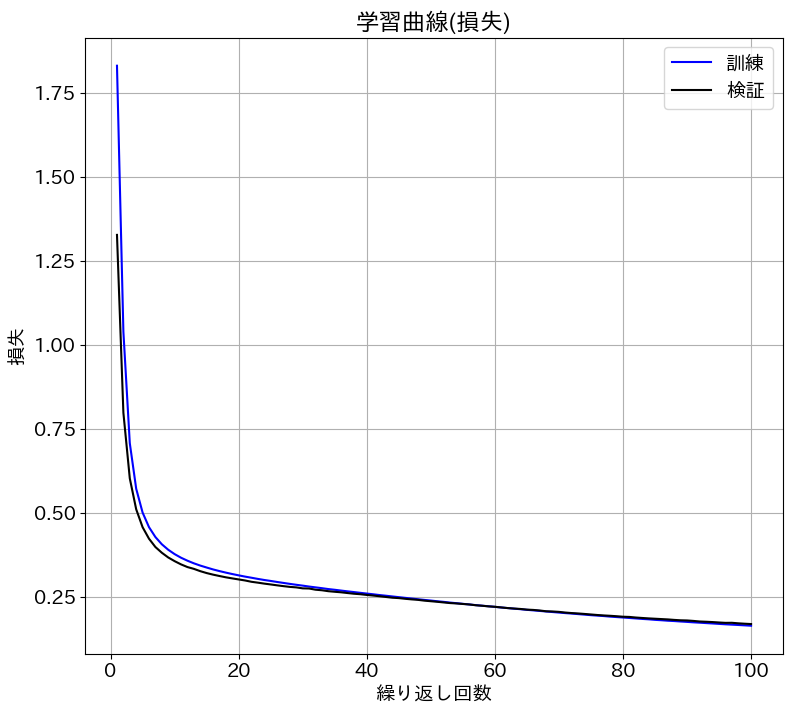

In [48]:
# 学習曲線の表示 (損失)

plt.rcParams['figure.figsize'] = (9,8)
plt.plot(history[:,0], history[:,1], 'b', label='訓練')
plt.plot(history[:,0], history[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

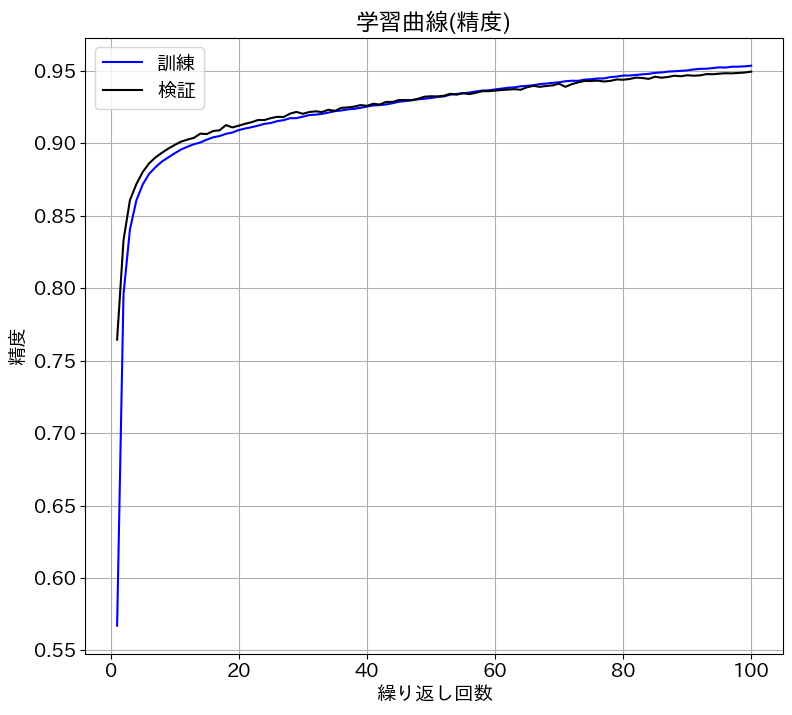

In [49]:
# 学習曲線の表示 (精度)

plt.rcParams['figure.figsize'] = (9,8)
plt.plot(history[:,0], history[:,2], 'b', label='訓練')
plt.plot(history[:,0], history[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()

### イメージ表示で確認

In [50]:
# DataLoaderから最初の1セットを取得する
for images, labels in test_loader:
    break

# 予測結果の取得
inputs = images.to(device)
labels = labels.to(device)
outputs = net(inputs)
predicted = torch.max(outputs, 1)[1]

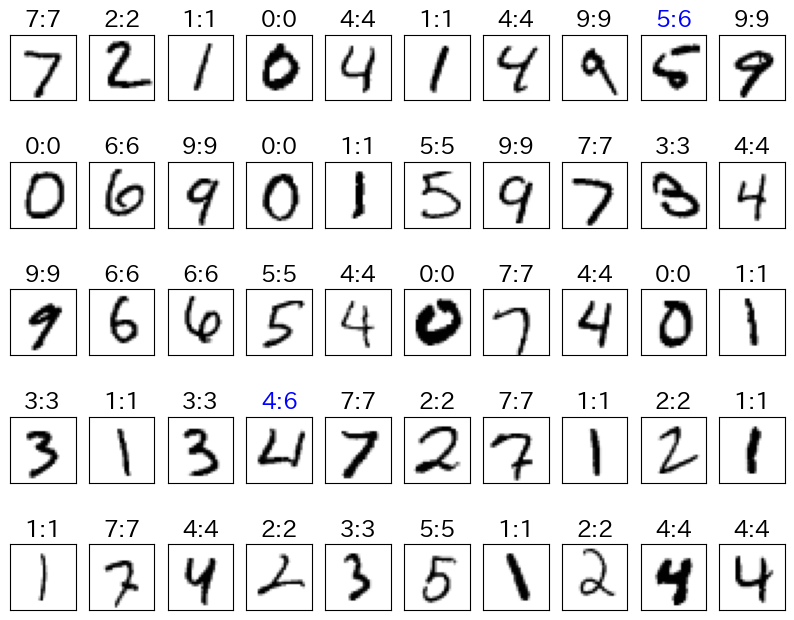

In [51]:
# 最初の50件でイメージを「正解値:予測値」と表示

plt.figure(figsize=(10, 8))
for i in range(50):
  ax = plt.subplot(5, 10, i + 1)
    
  # numpyに変換
  image = images[i]
  label = labels[i]
  pred = predicted[i]
  if (pred == label):
    c = 'k'
  else:
    c = 'b'
    
  # imgの範囲を[0, 1]に戻す
  image2 = (image + 1)/ 2
    
  # イメージ表示
  plt.imshow(image2.reshape(28, 28),cmap='gray_r')
  ax.set_title(f'{label}:{pred}', c=c)
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()


## 8.14 隠れ層の2層化

In [52]:
# モデルの定義
# 784入力10出力2隠れ層のニューラルネットワークモデル

class Net2(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()
        
        # 隠れ層1の定義 (隠れ層のノード数: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 隠れ層2の定義 (隠れ層のノード数: n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)

        # 出力層の定義
        self.l3 = nn.Linear(n_hidden, n_output)

        # ReLU関数の定義
        self.relu = nn.ReLU(inplace=True)

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.relu(x1)
        x3 = self.l2(x2)
        x4 = self.relu(x3)
        x5 = self.l3(x4)
        return x5

In [53]:
# 乱数の固定化
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# モデルインスタンス生成
net = Net2(n_input, n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [54]:
# モデルの概要表示

print(net)

Net2(
  (l1): Linear(in_features=784, out_features=128, bias=True)
  (l2): Linear(in_features=128, out_features=128, bias=True)
  (l3): Linear(in_features=128, out_features=10, bias=True)
  (relu): ReLU(inplace=True)
)


In [55]:
# モデルのサマリー表示

summary(net, (784,))

Layer (type:depth-idx)                   Output Shape              Param #
Net2                                     [10]                      --
├─Linear: 1-1                            [128]                     100,480
├─ReLU: 1-2                              [128]                     --
├─Linear: 1-3                            [128]                     16,512
├─ReLU: 1-4                              [128]                     --
├─Linear: 1-5                            [10]                      1,290
Total params: 118,282
Trainable params: 118,282
Non-trainable params: 0
Total mult-adds (M): 14.99
Input size (MB): 0.00
Forward/backward pass size (MB): 0.00
Params size (MB): 0.47
Estimated Total Size (MB): 0.48

In [56]:
# DataLoaderから最初の1セットを取得する
for images, labels in test_loader:
    break

# 予測結果の取得
inputs = images.to(device)
labels = labels.to(device)

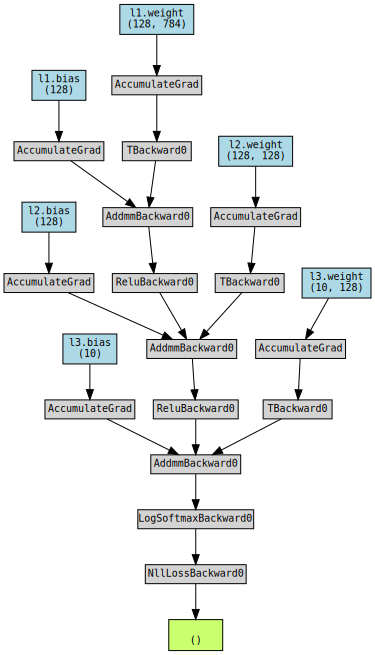

In [57]:
# 予測計算
outputs = net(inputs)

#  損失計算
loss = criterion(outputs, labels)

# 損失の計算グラフ可視化
make_dot(loss, params=dict(net.named_parameters()))

### 勾配計算

In [58]:
# 勾配計算
loss.backward()

# 勾配計算結果の一部
w = net.to('cpu').l1.weight.grad.numpy()
print(w)

# 各要素の絶対値の平均
print(np.abs(w).mean())

[[-0.00071 -0.00071 -0.00071 ... -0.00071 -0.00071 -0.00071]
 [-0.0001  -0.0001  -0.0001  ... -0.0001  -0.0001  -0.0001 ]
 [-0.00053 -0.00053 -0.00053 ... -0.00053 -0.00053 -0.00053]
 ...
 [ 0.00148  0.00148  0.00148 ...  0.00148  0.00148  0.00148]
 [ 0.00023  0.00023  0.00023 ...  0.00023  0.00023  0.00023]
 [ 0.00028  0.00028  0.00028 ...  0.00028  0.00028  0.00028]]
0.0008487979


### 繰り返し計算

In [59]:
# 乱数の固定化
torch.manual_seed(123)
torch.cuda.manual_seed(123)
torch.backends.cudnn.deterministic = True
torch.use_deterministic_algorithms = True

# モデルインスタンス生成
net = Net2(n_input, n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 繰り返し回数
num_epochs = 200

# 評価結果記録用
history2 = np.zeros((0,5))

In [62]:
# tqdmライブラリのインポート
#from tqdm.auto import tqdm

# 繰り返し計算メインループ

for epoch in range(num_epochs):
    # 1エポックあたりの正解数(精度計算用)
    n_train_acc, n_val_acc = 0, 0
    # 1エポックあたりの累積損失(平均化前)
    train_loss, val_loss = 0, 0
    # 1エポックあたりのデータ累積件数
    n_train, n_test = 0, 0

    # 訓練フェーズ
    for inputs, labels in tqdm(train_loader, leave = False):
        # 1バッチあたりのデータ件数
        train_batch_size = len(labels)
        # 1エポックあたりのデータ累積件数
        n_train += train_batch_size

        # GPUヘ転送
        inputs = inputs.to(device)
        labels = labels.to(device)
    
        #勾配の初期化
        optimizer.zero_grad()

        # 予測計算
        outputs = net(inputs)

        # 損失計算
        loss = criterion(outputs, labels)

        # 勾配計算
        loss.backward()
    
        # パラメータ修正
        optimizer.step()

        # 予測ラベル導出
        predicted = torch.max(outputs, 1)[1]

        # 平均前の損失と正解数の計算
        # lossは平均計算が行われているので平均前の損失に戻して加算
        train_loss += loss.item() * train_batch_size 
        n_train_acc += (predicted == labels).sum().item() 

    #予測フェーズ
    for inputs_test, labels_test in test_loader:
        # 1バッチあたりのデータ件数
        test_batch_size = len(labels_test)
        # 1エポックあたりのデータ累積件数
        n_test += test_batch_size

        inputs_test = inputs_test.to(device)
        labels_test = labels_test.to(device)
            
        # 予測計算
        outputs_test = net(inputs_test)

        # 損失計算
        loss_test = criterion(outputs_test, labels_test)

        #予測ラベル導出
        predicted_test = torch.max(outputs_test, 1)[1]

        #  平均前の損失と正解数の計算
        # lossは平均計算が行われているので平均前の損失に戻して加算
        val_loss +=  loss_test.item() * test_batch_size
        n_val_acc +=  (predicted_test == labels_test).sum().item()

    # 精度計算
    train_acc = n_train_acc / n_train
    val_acc = n_val_acc / n_test
    # 損失計算
    ave_train_loss = train_loss / n_train
    ave_val_loss = val_loss / n_test
    # 結果表示
    print (f'Epoch [{epoch+1}/{num_epochs}], loss: {ave_train_loss:.5f} acc: {train_acc:.5f} val_loss: {ave_val_loss:.5f}, val_acc: {val_acc:.5f}')
    # 記録
    item = np.array([epoch+1 , ave_train_loss, train_acc, ave_val_loss, val_acc])
    history2 = np.vstack((history2, item))

Epoch [1/200], loss: 0.68348 acc: 0.83500 val_loss: 0.59091, val_acc: 0.85440


Epoch [2/200], loss: 0.55614 acc: 0.85635 val_loss: 0.49907, val_acc: 0.86860


Epoch [3/200], loss: 0.48658 acc: 0.87038 val_loss: 0.44713, val_acc: 0.87900


Epoch [4/200], loss: 0.44354 acc: 0.87825 val_loss: 0.41107, val_acc: 0.88700


 28%|██▊       | 34/120 [00:02<00:05, 15.40it/s]Exception ignored in: <function tqdm.__del__ at 0x154cb5dbed40>
Traceback (most recent call last):
  File "/home/miyawaki/anaconda3/envs/irvs_get_started/lib/python3.10/site-packages/tqdm/std.py", line 1145, in __del__
    self.close()
  File "/home/miyawaki/anaconda3/envs/irvs_get_started/lib/python3.10/site-packages/tqdm/notebook.py", line 283, in close
    self.disp(bar_style='danger', check_delay=False)
AttributeError: 'tqdm_notebook' object has no attribute 'disp'


Epoch [5/200], loss: 0.41437 acc: 0.88405 val_loss: 0.38665, val_acc: 0.89360


Epoch [6/200], loss: 0.39283 acc: 0.88872 val_loss: 0.36793, val_acc: 0.89710


Epoch [7/200], loss: 0.37652 acc: 0.89253 val_loss: 0.35499, val_acc: 0.89930


Epoch [8/200], loss: 0.36366 acc: 0.89582 val_loss: 0.34422, val_acc: 0.90200


Epoch [9/200], loss: 0.35249 acc: 0.89827 val_loss: 0.33463, val_acc: 0.90350


Epoch [10/200], loss: 0.34307 acc: 0.90053 val_loss: 0.32614, val_acc: 0.90620


Epoch [11/200], loss: 0.33498 acc: 0.90360 val_loss: 0.31965, val_acc: 0.90940


Epoch [12/200], loss: 0.32783 acc: 0.90452 val_loss: 0.31199, val_acc: 0.90960


Epoch [13/200], loss: 0.32119 acc: 0.90693 val_loss: 0.30786, val_acc: 0.91260


Epoch [14/200], loss: 0.31533 acc: 0.90798 val_loss: 0.30191, val_acc: 0.91260


Epoch [15/200], loss: 0.30993 acc: 0.90967 val_loss: 0.29615, val_acc: 0.91420


Epoch [16/200], loss: 0.30511 acc: 0.91142 val_loss: 0.29323, val_acc: 0.91420


Epoch [17/200], loss: 0.30047 acc: 0.91265 val_loss: 0.28826, val_acc: 0.91610


Epoch [18/200], loss: 0.29575 acc: 0.91413 val_loss: 0.28695, val_acc: 0.91620


Epoch [19/200], loss: 0.29165 acc: 0.91562 val_loss: 0.28141, val_acc: 0.91870


Epoch [20/200], loss: 0.28753 acc: 0.91583 val_loss: 0.27676, val_acc: 0.92050


Epoch [21/200], loss: 0.28380 acc: 0.91757 val_loss: 0.27587, val_acc: 0.91900


Epoch [22/200], loss: 0.27990 acc: 0.91833 val_loss: 0.27336, val_acc: 0.91990


Epoch [23/200], loss: 0.27661 acc: 0.91927 val_loss: 0.26740, val_acc: 0.92250


Epoch [24/200], loss: 0.27289 acc: 0.92087 val_loss: 0.26630, val_acc: 0.92250


Epoch [25/200], loss: 0.26965 acc: 0.92175 val_loss: 0.26190, val_acc: 0.92340


Epoch [26/200], loss: 0.26654 acc: 0.92208 val_loss: 0.25962, val_acc: 0.92450


Epoch [27/200], loss: 0.26356 acc: 0.92293 val_loss: 0.25582, val_acc: 0.92650


Epoch [28/200], loss: 0.26025 acc: 0.92483 val_loss: 0.25398, val_acc: 0.92540


Epoch [29/200], loss: 0.25722 acc: 0.92545 val_loss: 0.25205, val_acc: 0.92570


Epoch [30/200], loss: 0.25427 acc: 0.92590 val_loss: 0.24828, val_acc: 0.92800


Epoch [31/200], loss: 0.25143 acc: 0.92732 val_loss: 0.24560, val_acc: 0.92920


Epoch [32/200], loss: 0.24868 acc: 0.92790 val_loss: 0.24380, val_acc: 0.92960


Epoch [33/200], loss: 0.24583 acc: 0.92882 val_loss: 0.24229, val_acc: 0.93060


Epoch [34/200], loss: 0.24324 acc: 0.92937 val_loss: 0.23852, val_acc: 0.93120


Epoch [35/200], loss: 0.24038 acc: 0.93048 val_loss: 0.23812, val_acc: 0.93270


Epoch [36/200], loss: 0.23779 acc: 0.93123 val_loss: 0.23431, val_acc: 0.93310


Epoch [37/200], loss: 0.23509 acc: 0.93198 val_loss: 0.23207, val_acc: 0.93210


Epoch [38/200], loss: 0.23262 acc: 0.93267 val_loss: 0.22964, val_acc: 0.93420


Epoch [39/200], loss: 0.23010 acc: 0.93363 val_loss: 0.22710, val_acc: 0.93370


Epoch [40/200], loss: 0.22731 acc: 0.93427 val_loss: 0.22597, val_acc: 0.93400


Epoch [41/200], loss: 0.22510 acc: 0.93462 val_loss: 0.22299, val_acc: 0.93500


Epoch [42/200], loss: 0.22252 acc: 0.93535 val_loss: 0.22104, val_acc: 0.93600


Epoch [43/200], loss: 0.21996 acc: 0.93645 val_loss: 0.21794, val_acc: 0.93620


Epoch [44/200], loss: 0.21760 acc: 0.93780 val_loss: 0.21740, val_acc: 0.93740


Epoch [45/200], loss: 0.21515 acc: 0.93792 val_loss: 0.21389, val_acc: 0.93790


Epoch [46/200], loss: 0.21288 acc: 0.93853 val_loss: 0.21214, val_acc: 0.93900


Epoch [47/200], loss: 0.21053 acc: 0.93898 val_loss: 0.20996, val_acc: 0.93780


Epoch [48/200], loss: 0.20834 acc: 0.93955 val_loss: 0.20718, val_acc: 0.93950


Epoch [49/200], loss: 0.20596 acc: 0.94070 val_loss: 0.20514, val_acc: 0.93870


Epoch [50/200], loss: 0.20383 acc: 0.94132 val_loss: 0.20364, val_acc: 0.94010


Epoch [51/200], loss: 0.20158 acc: 0.94168 val_loss: 0.20174, val_acc: 0.93980


Epoch [52/200], loss: 0.19950 acc: 0.94268 val_loss: 0.19991, val_acc: 0.94070


Epoch [53/200], loss: 0.19750 acc: 0.94335 val_loss: 0.19773, val_acc: 0.94190


Epoch [54/200], loss: 0.19526 acc: 0.94355 val_loss: 0.19632, val_acc: 0.94140


Epoch [55/200], loss: 0.19324 acc: 0.94425 val_loss: 0.19381, val_acc: 0.94220


Epoch [56/200], loss: 0.19117 acc: 0.94510 val_loss: 0.19222, val_acc: 0.94250


Epoch [57/200], loss: 0.18920 acc: 0.94513 val_loss: 0.19037, val_acc: 0.94310


Epoch [58/200], loss: 0.18734 acc: 0.94588 val_loss: 0.18873, val_acc: 0.94370


Epoch [59/200], loss: 0.18546 acc: 0.94680 val_loss: 0.18731, val_acc: 0.94440


Epoch [60/200], loss: 0.18344 acc: 0.94712 val_loss: 0.18573, val_acc: 0.94460


Epoch [61/200], loss: 0.18163 acc: 0.94775 val_loss: 0.18310, val_acc: 0.94580


Epoch [62/200], loss: 0.17985 acc: 0.94825 val_loss: 0.18150, val_acc: 0.94570


Epoch [63/200], loss: 0.17811 acc: 0.94873 val_loss: 0.17980, val_acc: 0.94720


Epoch [64/200], loss: 0.17615 acc: 0.94917 val_loss: 0.17817, val_acc: 0.94660


Epoch [65/200], loss: 0.17429 acc: 0.94965 val_loss: 0.17649, val_acc: 0.94740


Epoch [66/200], loss: 0.17271 acc: 0.95005 val_loss: 0.17751, val_acc: 0.94820


Epoch [67/200], loss: 0.17103 acc: 0.95082 val_loss: 0.17469, val_acc: 0.94800


Epoch [68/200], loss: 0.16928 acc: 0.95122 val_loss: 0.17224, val_acc: 0.94780


Epoch [69/200], loss: 0.16761 acc: 0.95192 val_loss: 0.17000, val_acc: 0.94950


Epoch [70/200], loss: 0.16595 acc: 0.95195 val_loss: 0.17011, val_acc: 0.95070


Epoch [71/200], loss: 0.16432 acc: 0.95318 val_loss: 0.16809, val_acc: 0.95070


Epoch [72/200], loss: 0.16287 acc: 0.95342 val_loss: 0.16649, val_acc: 0.94970


Epoch [73/200], loss: 0.16137 acc: 0.95378 val_loss: 0.16495, val_acc: 0.95180


Epoch [74/200], loss: 0.15965 acc: 0.95440 val_loss: 0.16373, val_acc: 0.95110


Epoch [75/200], loss: 0.15831 acc: 0.95443 val_loss: 0.16323, val_acc: 0.95230


Epoch [76/200], loss: 0.15676 acc: 0.95513 val_loss: 0.16076, val_acc: 0.95210


Epoch [77/200], loss: 0.15520 acc: 0.95565 val_loss: 0.16046, val_acc: 0.95190


Epoch [78/200], loss: 0.15371 acc: 0.95603 val_loss: 0.15961, val_acc: 0.95220


Epoch [79/200], loss: 0.15236 acc: 0.95673 val_loss: 0.15720, val_acc: 0.95320


Epoch [80/200], loss: 0.15116 acc: 0.95677 val_loss: 0.15586, val_acc: 0.95340


Epoch [81/200], loss: 0.14962 acc: 0.95723 val_loss: 0.15462, val_acc: 0.95300


Epoch [82/200], loss: 0.14811 acc: 0.95755 val_loss: 0.15487, val_acc: 0.95320


Epoch [83/200], loss: 0.14689 acc: 0.95775 val_loss: 0.15244, val_acc: 0.95440


Epoch [84/200], loss: 0.14551 acc: 0.95815 val_loss: 0.15140, val_acc: 0.95500


Epoch [85/200], loss: 0.14428 acc: 0.95902 val_loss: 0.15058, val_acc: 0.95500


Epoch [86/200], loss: 0.14287 acc: 0.95935 val_loss: 0.15045, val_acc: 0.95490


Epoch [87/200], loss: 0.14181 acc: 0.95932 val_loss: 0.14880, val_acc: 0.95520


Epoch [88/200], loss: 0.14043 acc: 0.95980 val_loss: 0.14787, val_acc: 0.95510


Epoch [89/200], loss: 0.13929 acc: 0.96022 val_loss: 0.14540, val_acc: 0.95710


Epoch [90/200], loss: 0.13797 acc: 0.96042 val_loss: 0.14493, val_acc: 0.95670


Epoch [91/200], loss: 0.13681 acc: 0.96103 val_loss: 0.14394, val_acc: 0.95700


Epoch [92/200], loss: 0.13565 acc: 0.96120 val_loss: 0.14329, val_acc: 0.95730


Epoch [93/200], loss: 0.13451 acc: 0.96167 val_loss: 0.14303, val_acc: 0.95720


Epoch [94/200], loss: 0.13317 acc: 0.96182 val_loss: 0.14084, val_acc: 0.95810


Epoch [95/200], loss: 0.13212 acc: 0.96223 val_loss: 0.14041, val_acc: 0.95780


Epoch [96/200], loss: 0.13105 acc: 0.96268 val_loss: 0.14046, val_acc: 0.95810


Epoch [97/200], loss: 0.12973 acc: 0.96300 val_loss: 0.13919, val_acc: 0.95760


Epoch [98/200], loss: 0.12887 acc: 0.96327 val_loss: 0.13741, val_acc: 0.95800


Epoch [99/200], loss: 0.12784 acc: 0.96378 val_loss: 0.13635, val_acc: 0.95830


Epoch [100/200], loss: 0.12680 acc: 0.96393 val_loss: 0.13592, val_acc: 0.95800


Epoch [101/200], loss: 0.12578 acc: 0.96445 val_loss: 0.13501, val_acc: 0.95870


Epoch [102/200], loss: 0.12447 acc: 0.96470 val_loss: 0.13465, val_acc: 0.95900


Epoch [103/200], loss: 0.12358 acc: 0.96490 val_loss: 0.13355, val_acc: 0.95930


Epoch [104/200], loss: 0.12246 acc: 0.96532 val_loss: 0.13234, val_acc: 0.95950


Epoch [105/200], loss: 0.12151 acc: 0.96590 val_loss: 0.13240, val_acc: 0.95980


Epoch [106/200], loss: 0.12041 acc: 0.96570 val_loss: 0.13016, val_acc: 0.95960


Epoch [107/200], loss: 0.11951 acc: 0.96587 val_loss: 0.12987, val_acc: 0.96050


Epoch [108/200], loss: 0.11839 acc: 0.96660 val_loss: 0.12873, val_acc: 0.96100


Epoch [109/200], loss: 0.11752 acc: 0.96668 val_loss: 0.12869, val_acc: 0.96040


Epoch [110/200], loss: 0.11678 acc: 0.96712 val_loss: 0.12711, val_acc: 0.96110


Epoch [111/200], loss: 0.11565 acc: 0.96718 val_loss: 0.12782, val_acc: 0.96080


Epoch [112/200], loss: 0.11478 acc: 0.96735 val_loss: 0.12711, val_acc: 0.96100


Epoch [113/200], loss: 0.11391 acc: 0.96753 val_loss: 0.12532, val_acc: 0.96150


Epoch [114/200], loss: 0.11299 acc: 0.96820 val_loss: 0.12504, val_acc: 0.96230


Epoch [115/200], loss: 0.11205 acc: 0.96820 val_loss: 0.12365, val_acc: 0.96270


Epoch [116/200], loss: 0.11118 acc: 0.96825 val_loss: 0.12281, val_acc: 0.96260


Epoch [117/200], loss: 0.11039 acc: 0.96845 val_loss: 0.12289, val_acc: 0.96230


Epoch [118/200], loss: 0.10946 acc: 0.96917 val_loss: 0.12236, val_acc: 0.96240


Epoch [119/200], loss: 0.10840 acc: 0.96957 val_loss: 0.12130, val_acc: 0.96290


Epoch [120/200], loss: 0.10771 acc: 0.96947 val_loss: 0.12009, val_acc: 0.96300


Epoch [121/200], loss: 0.10690 acc: 0.96950 val_loss: 0.12033, val_acc: 0.96330


Epoch [122/200], loss: 0.10611 acc: 0.96997 val_loss: 0.11927, val_acc: 0.96430


Epoch [123/200], loss: 0.10553 acc: 0.97020 val_loss: 0.11879, val_acc: 0.96380


Epoch [124/200], loss: 0.10437 acc: 0.97040 val_loss: 0.11799, val_acc: 0.96410


Epoch [125/200], loss: 0.10361 acc: 0.97097 val_loss: 0.11939, val_acc: 0.96360


Epoch [126/200], loss: 0.10295 acc: 0.97080 val_loss: 0.11675, val_acc: 0.96470


Epoch [127/200], loss: 0.10224 acc: 0.97098 val_loss: 0.11752, val_acc: 0.96420


Epoch [128/200], loss: 0.10117 acc: 0.97142 val_loss: 0.11545, val_acc: 0.96510


Epoch [129/200], loss: 0.10060 acc: 0.97163 val_loss: 0.11535, val_acc: 0.96390


Epoch [130/200], loss: 0.09999 acc: 0.97195 val_loss: 0.11457, val_acc: 0.96480


Epoch [131/200], loss: 0.09909 acc: 0.97208 val_loss: 0.11454, val_acc: 0.96540


Epoch [132/200], loss: 0.09840 acc: 0.97217 val_loss: 0.11423, val_acc: 0.96480


Epoch [133/200], loss: 0.09777 acc: 0.97258 val_loss: 0.11296, val_acc: 0.96560


Epoch [134/200], loss: 0.09705 acc: 0.97277 val_loss: 0.11233, val_acc: 0.96510


Epoch [135/200], loss: 0.09626 acc: 0.97293 val_loss: 0.11250, val_acc: 0.96620


Epoch [136/200], loss: 0.09550 acc: 0.97323 val_loss: 0.11127, val_acc: 0.96530


Epoch [137/200], loss: 0.09480 acc: 0.97348 val_loss: 0.11220, val_acc: 0.96560


Epoch [138/200], loss: 0.09408 acc: 0.97380 val_loss: 0.11055, val_acc: 0.96680


Epoch [139/200], loss: 0.09357 acc: 0.97385 val_loss: 0.11110, val_acc: 0.96620


Epoch [140/200], loss: 0.09291 acc: 0.97417 val_loss: 0.11010, val_acc: 0.96710


Epoch [141/200], loss: 0.09225 acc: 0.97413 val_loss: 0.10844, val_acc: 0.96660


Epoch [142/200], loss: 0.09151 acc: 0.97453 val_loss: 0.10987, val_acc: 0.96660


Epoch [143/200], loss: 0.09090 acc: 0.97452 val_loss: 0.10781, val_acc: 0.96710


Epoch [144/200], loss: 0.09021 acc: 0.97473 val_loss: 0.10808, val_acc: 0.96690


Epoch [145/200], loss: 0.08974 acc: 0.97485 val_loss: 0.10806, val_acc: 0.96640


Epoch [146/200], loss: 0.08899 acc: 0.97505 val_loss: 0.10677, val_acc: 0.96680


Epoch [147/200], loss: 0.08832 acc: 0.97550 val_loss: 0.10733, val_acc: 0.96700


Epoch [148/200], loss: 0.08779 acc: 0.97538 val_loss: 0.10604, val_acc: 0.96740


Epoch [149/200], loss: 0.08722 acc: 0.97555 val_loss: 0.10622, val_acc: 0.96700


Epoch [150/200], loss: 0.08667 acc: 0.97620 val_loss: 0.10470, val_acc: 0.96810


Epoch [151/200], loss: 0.08594 acc: 0.97625 val_loss: 0.10559, val_acc: 0.96800


Epoch [152/200], loss: 0.08534 acc: 0.97617 val_loss: 0.10436, val_acc: 0.96850


Epoch [153/200], loss: 0.08465 acc: 0.97643 val_loss: 0.10318, val_acc: 0.96820


Epoch [154/200], loss: 0.08418 acc: 0.97663 val_loss: 0.10327, val_acc: 0.96840


Epoch [155/200], loss: 0.08365 acc: 0.97670 val_loss: 0.10327, val_acc: 0.96840


Epoch [156/200], loss: 0.08306 acc: 0.97707 val_loss: 0.10219, val_acc: 0.96900


Epoch [157/200], loss: 0.08253 acc: 0.97698 val_loss: 0.10306, val_acc: 0.96790


Epoch [158/200], loss: 0.08200 acc: 0.97725 val_loss: 0.10185, val_acc: 0.96880


Epoch [159/200], loss: 0.08137 acc: 0.97758 val_loss: 0.10188, val_acc: 0.96930


Epoch [160/200], loss: 0.08093 acc: 0.97778 val_loss: 0.10009, val_acc: 0.96940


Epoch [161/200], loss: 0.08036 acc: 0.97772 val_loss: 0.10031, val_acc: 0.96920


Epoch [162/200], loss: 0.07981 acc: 0.97798 val_loss: 0.10077, val_acc: 0.96850


Epoch [163/200], loss: 0.07924 acc: 0.97783 val_loss: 0.10056, val_acc: 0.96920


Epoch [164/200], loss: 0.07871 acc: 0.97822 val_loss: 0.09990, val_acc: 0.96980


Epoch [165/200], loss: 0.07813 acc: 0.97838 val_loss: 0.09869, val_acc: 0.96980


Epoch [166/200], loss: 0.07773 acc: 0.97827 val_loss: 0.09821, val_acc: 0.96930


Epoch [167/200], loss: 0.07727 acc: 0.97885 val_loss: 0.09897, val_acc: 0.96910


Epoch [168/200], loss: 0.07662 acc: 0.97898 val_loss: 0.09726, val_acc: 0.96970


Epoch [169/200], loss: 0.07628 acc: 0.97873 val_loss: 0.09802, val_acc: 0.96970


Epoch [170/200], loss: 0.07568 acc: 0.97945 val_loss: 0.09697, val_acc: 0.97020


Epoch [171/200], loss: 0.07520 acc: 0.97923 val_loss: 0.09720, val_acc: 0.97010


Epoch [172/200], loss: 0.07476 acc: 0.97945 val_loss: 0.09666, val_acc: 0.97050


Epoch [173/200], loss: 0.07424 acc: 0.97952 val_loss: 0.09682, val_acc: 0.97030


Epoch [174/200], loss: 0.07388 acc: 0.97975 val_loss: 0.09560, val_acc: 0.97030


Epoch [175/200], loss: 0.07331 acc: 0.97995 val_loss: 0.09567, val_acc: 0.97000


Epoch [176/200], loss: 0.07275 acc: 0.97970 val_loss: 0.09520, val_acc: 0.97070


Epoch [177/200], loss: 0.07241 acc: 0.97987 val_loss: 0.09449, val_acc: 0.97030


Epoch [178/200], loss: 0.07197 acc: 0.98002 val_loss: 0.09444, val_acc: 0.96980


Epoch [179/200], loss: 0.07152 acc: 0.98033 val_loss: 0.09452, val_acc: 0.97020


Epoch [180/200], loss: 0.07111 acc: 0.98033 val_loss: 0.09414, val_acc: 0.97050


Epoch [181/200], loss: 0.07054 acc: 0.98075 val_loss: 0.09418, val_acc: 0.97090


Epoch [182/200], loss: 0.07020 acc: 0.98047 val_loss: 0.09373, val_acc: 0.97090


Epoch [183/200], loss: 0.06965 acc: 0.98077 val_loss: 0.09437, val_acc: 0.97130


Epoch [184/200], loss: 0.06930 acc: 0.98095 val_loss: 0.09290, val_acc: 0.97120


Epoch [185/200], loss: 0.06899 acc: 0.98103 val_loss: 0.09269, val_acc: 0.97110


Epoch [186/200], loss: 0.06851 acc: 0.98115 val_loss: 0.09218, val_acc: 0.97100


Epoch [187/200], loss: 0.06813 acc: 0.98118 val_loss: 0.09215, val_acc: 0.97160


Epoch [188/200], loss: 0.06764 acc: 0.98147 val_loss: 0.09153, val_acc: 0.97120


Epoch [189/200], loss: 0.06714 acc: 0.98138 val_loss: 0.09179, val_acc: 0.97130


Epoch [190/200], loss: 0.06673 acc: 0.98170 val_loss: 0.09093, val_acc: 0.97140


Epoch [191/200], loss: 0.06652 acc: 0.98143 val_loss: 0.09098, val_acc: 0.97110


Epoch [192/200], loss: 0.06605 acc: 0.98162 val_loss: 0.09126, val_acc: 0.97080


Epoch [193/200], loss: 0.06560 acc: 0.98190 val_loss: 0.09197, val_acc: 0.97200


Epoch [194/200], loss: 0.06520 acc: 0.98203 val_loss: 0.09158, val_acc: 0.97170


Epoch [195/200], loss: 0.06478 acc: 0.98215 val_loss: 0.09063, val_acc: 0.97170


Epoch [196/200], loss: 0.06447 acc: 0.98213 val_loss: 0.08963, val_acc: 0.97240


Epoch [197/200], loss: 0.06403 acc: 0.98255 val_loss: 0.09046, val_acc: 0.97210


Epoch [198/200], loss: 0.06365 acc: 0.98245 val_loss: 0.08929, val_acc: 0.97190


Epoch [199/200], loss: 0.06334 acc: 0.98278 val_loss: 0.08867, val_acc: 0.97180


Epoch [200/200], loss: 0.06291 acc: 0.98288 val_loss: 0.08871, val_acc: 0.97170


In [63]:
#損失と精度の確認

print(f'初期状態: 損失: {history2[0,3]:.5f} 精度: {history2[0,4]:.5f}' )
print(f'最終状態: 損失: {history2[-1,3]:.5f} 精度: {history2[-1,4]:.5f}' )

初期状態: 損失: 2.04603 精度: 0.48140
最終状態: 損失: 0.08871 精度: 0.97170


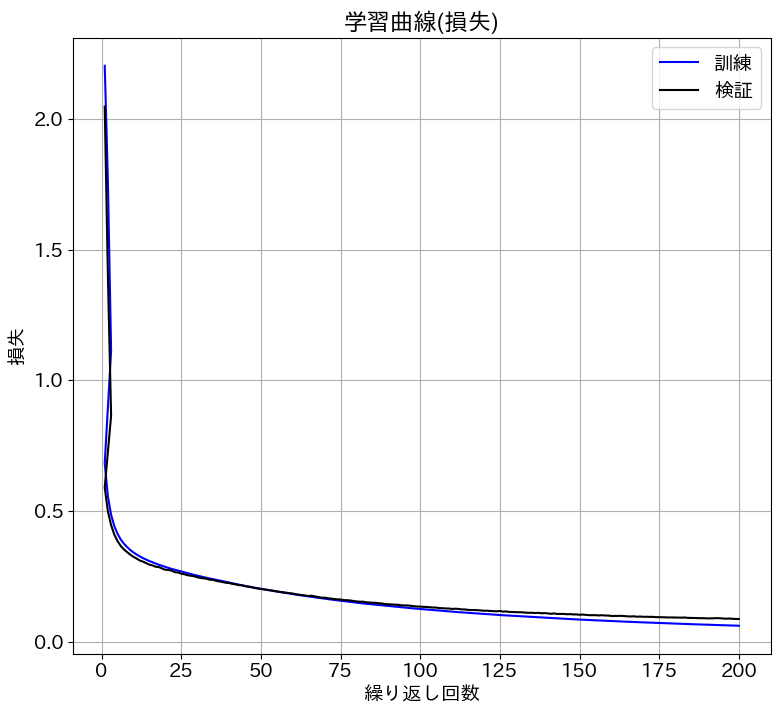

In [64]:
# 学習曲線の表示 (損失)

plt.plot(history2[:,0], history2[:,1], 'b', label='訓練')
plt.plot(history2[:,0], history2[:,3], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('損失')
plt.title('学習曲線(損失)')
plt.legend()
plt.show()

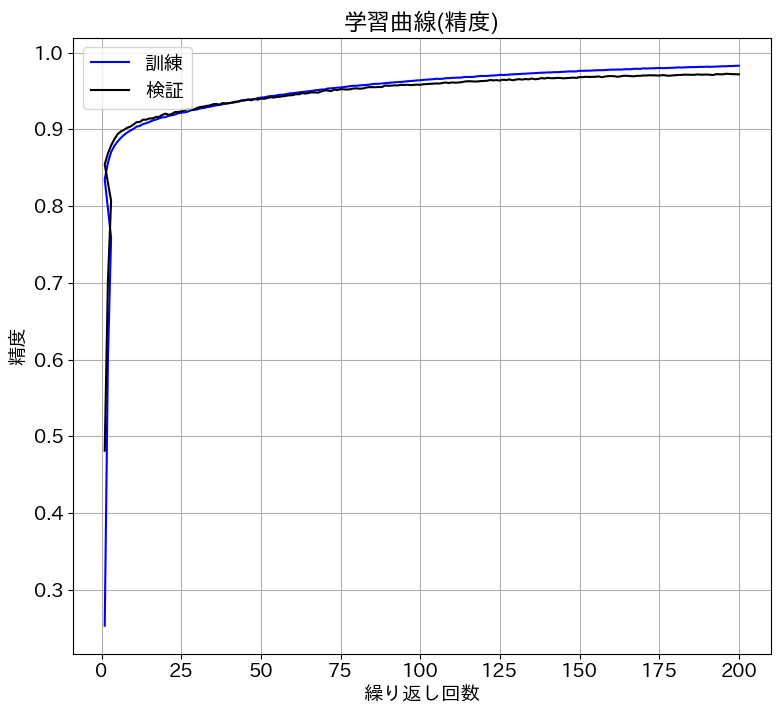

In [65]:
# 学習曲線の表示 (精度)

plt.plot(history2[:,0], history2[:,2], 'b', label='訓練')
plt.plot(history2[:,0], history2[:,4], 'k', label='検証')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()

## コラム　勾配消失とReLU関数

In [66]:
# モデルの定義　シグモイド関数バージョン
# 784入力10出力2隠れ層のニューラルネットワークモデル

class Net3(nn.Module):
    def __init__(self, n_input, n_output, n_hidden):
        super().__init__()
        
        # 隠れ層1の定義 (隠れ層のノード数: n_hidden)
        self.l1 = nn.Linear(n_input, n_hidden)

        # 隠れ層2の定義 (隠れ層のノード数: n_hidden)
        self.l2 = nn.Linear(n_hidden, n_hidden)

        # 出力層の定義
        self.l3 = nn.Linear(n_hidden, n_output)

        # シグモイド関数の定義
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x1 = self.l1(x)
        x2 = self.sigmoid(x1)
        x3 = self.l2(x2)
        x4 = self.sigmoid(x3)
        x5 = self.l3(x4)
        return x5

In [67]:
# 乱数の固定化
torch.manual_seed(123)
torch.cuda.manual_seed(123)

# モデルインスタンス生成
net = Net3(n_input, n_output, n_hidden).to(device)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 最適化関数: 勾配降下法
optimizer = torch.optim.SGD(net.parameters(), lr=lr)

In [68]:
# DataLoaderから最初の1セットを取得する
for images, labels in test_loader:
    break

# 予測結果の取得
inputs = images.to(device)
labels = labels.to(device)

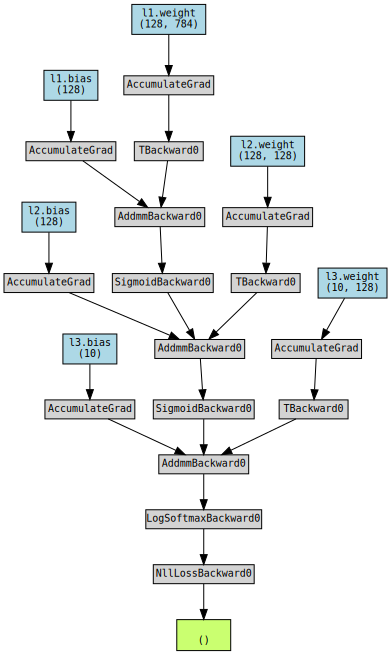

In [69]:
# 予測計算
outputs = net(inputs)

# 損失計算
loss = criterion(outputs, labels)

# 損失の計算グラフ可視化
make_dot(loss, params=dict(net.named_parameters()))

In [70]:
# 勾配計算
loss.backward()

# 勾配計算結果の一部
w = net.to('cpu').l1.weight.grad.numpy()
print(w)

# 各要素の絶対値の平均
print(np.abs(w).mean())

[[ 0.00012  0.00012  0.00012 ...  0.00012  0.00012  0.00012]
 [ 0.00014  0.00014  0.00014 ...  0.00014  0.00014  0.00014]
 [-0.00014 -0.00014 -0.00014 ... -0.00014 -0.00014 -0.00014]
 ...
 [-0.00013 -0.00013 -0.00013 ... -0.00013 -0.00013 -0.00013]
 [ 0.00018  0.00018  0.00018 ...  0.00018  0.00018  0.00018]
 [-0.00009 -0.00009 -0.00009 ... -0.00009 -0.00009 -0.00009]]
0.00017514593


## コラム　lambda式による関数定義

In [71]:
# 通常の関数定義

def f(x):
    return (2 * x**2 + 2)

In [72]:
x = np.arange(-2, 2.1, 0.25)
y = f(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


In [73]:
# lambda式による関数定義

g = lambda x: 2 * x**2 + 2

In [74]:
y = g(x)
print(y)

[10.     8.125  6.5    5.125  4.     3.125  2.5    2.125  2.     2.125
  2.5    3.125  4.     5.125  6.5    8.125 10.   ]


## コラム バッチサイズと精度

### fit関数の定義

In [75]:
# 学習用関数
def fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history):

    # tqdmライブラリのインポート
    from tqdm.notebook import tqdm

    base_epochs = len(history)
  
    for epoch in range(base_epochs, num_epochs+base_epochs):
        # 1エポックあたりの正解数(精度計算用)
        n_train_acc, n_val_acc = 0, 0
        # 1エポックあたりの累積損失(平均化前)
        train_loss, val_loss = 0, 0
        # 1エポックあたりのデータ累積件数
        n_train, n_test = 0, 0

        #訓練フェーズ
        net.train()

        for inputs, labels in tqdm(train_loader):
            # 1バッチあたりのデータ件数
            train_batch_size = len(labels)
            # 1エポックあたりのデータ累積件数
            n_train += train_batch_size
    
            # GPUヘ転送
            inputs = inputs.to(device)
            labels = labels.to(device)

            # 勾配の初期化
            optimizer.zero_grad()

            # 予測計算
            outputs = net(inputs)

            # 損失計算
            loss = criterion(outputs, labels)

            # 勾配計算
            loss.backward()

            # パラメータ修正
            optimizer.step()

            # 予測ラベル導出
            predicted = torch.max(outputs, 1)[1]

            # 平均前の損失と正解数の計算
            # lossは平均計算が行われているので平均前の損失に戻して加算
            train_loss += loss.item() * train_batch_size 
            n_train_acc += (predicted == labels).sum().item() 

        #予測フェーズ
        net.eval()

        for inputs_test, labels_test in test_loader:
            # 1バッチあたりのデータ件数
            test_batch_size = len(labels_test)
            # 1エポックあたりのデータ累積件数
            n_test += test_batch_size

            # GPUヘ転送
            inputs_test = inputs_test.to(device)
            labels_test = labels_test.to(device)

            # 予測計算
            outputs_test = net(inputs_test)

            # 損失計算
            loss_test = criterion(outputs_test, labels_test)
 
            # 予測ラベル導出
            predicted_test = torch.max(outputs_test, 1)[1]

            #  平均前の損失と正解数の計算
            # lossは平均計算が行われているので平均前の損失に戻して加算
            val_loss +=  loss_test.item() * test_batch_size
            n_val_acc +=  (predicted_test == labels_test).sum().item()

        # 精度計算
        train_acc = n_train_acc / n_train
        val_acc = n_val_acc / n_test
        # 損失計算
        avg_train_loss = train_loss / n_train
        avg_val_loss = val_loss / n_test
        # 結果表示
        print (f'Epoch [{(epoch+1)}/{num_epochs+base_epochs}], loss: {avg_train_loss:.5f} acc: {train_acc:.5f} val_loss: {avg_val_loss:.5f}, val_acc: {val_acc:.5f}')
        # 記録
        item = np.array([epoch+1, avg_train_loss, train_acc, avg_val_loss, val_acc])
        history = np.vstack((history, item))
    return history

In [76]:
# PyTorch乱数固定用

def torch_seed(seed=123):
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.use_deterministic_algorithms = True

In [77]:
# ミニバッチのサイズ指定
batch_size_train = 500

# 訓練用データローダー
# 訓練用なので、シャッフルをかける
train_loader = DataLoader(
    train_set, batch_size = batch_size_train, 
    shuffle = True)

# 乱数の固定化
torch_seed()

# 学習率
lr = 0.01

# モデルインスタンス生成
net = Net(n_input, n_output, n_hidden).to(device)

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 繰り返し回数
num_epochs = 100

# 評価結果記録用
history6 = np.zeros((0,5))

In [78]:
history6 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history6)

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

### batch_size=200

In [ ]:
# ミニバッチのサイズ指定
batch_size_train = 200

# 訓練用データローダー
# 訓練用なので、シャッフルをかける
train_loader = DataLoader(
    train_set, batch_size = batch_size_train, 
    shuffle = True)

# 乱数の固定化
torch_seed()

# 学習率
lr = 0.01

# モデルインスタンス生成
net = Net(n_input, n_output, n_hidden).to(device)

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 繰り返し回数
num_epochs = 100

# 評価結果記録用
history3 = np.zeros((0,5))

In [ ]:
history3 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history3)

### batch_size=100

In [ ]:
# ミニバッチのサイズ指定
batch_size_train = 100

# 訓練用データローダー
# 訓練用なので、シャッフルをかける
train_loader = DataLoader(
    train_set, batch_size = batch_size_train, 
    shuffle = True)

# 乱数の固定化
torch_seed()

# 学習率
lr = 0.01

# モデル初期化
net = Net(n_input, n_output, n_hidden).to(device)

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 繰り返し回数
num_epochs = 100

# 評価結果記録用
history4 = np.zeros((0,5))

In [ ]:
history4 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history4)

### batch_size=50

In [ ]:
# ミニバッチのサイズ指定
batch_size_train = 50

# 訓練用データローダー
# 訓練用なので、シャッフルをかける
train_loader = DataLoader(
    train_set, batch_size = batch_size_train, 
    shuffle = True)

# 乱数の固定化
torch_seed()

# 学習率
lr = 0.01

# モデル初期化
net = Net(n_input, n_output, n_hidden).to(device)

# 最適化アルゴリズム: 勾配降下法
optimizer = optim.SGD(net.parameters(), lr=lr)

# 損失関数： 交差エントロピー関数
criterion = nn.CrossEntropyLoss()

# 繰り返し回数
num_epochs = 100

# 評価結果記録用
history5 = np.zeros((0,5))

In [ ]:
history5 = fit(net, optimizer, criterion, num_epochs, train_loader, test_loader, device, history5)

### 学習曲線の比較

In [ ]:
# 学習曲線の表示 (精度)

plt.plot(history[:,0], history[:,4], label='batch_size=500', c='k', linestyle='-.')
plt.plot(history3[:,0], history3[:,4], label='batch_size=200', c='b', linestyle='-.')
plt.plot(history4[:,0], history4[:,4], label='batch_size=100', c='k')
plt.plot(history5[:,0], history5[:,4], label='batch_size=50', c='b')
plt.xlabel('繰り返し回数')
plt.ylabel('精度')
plt.title('学習曲線(精度)')
plt.legend()
plt.show()